In [118]:
import cv2
import numpy as np
import torch.nn.functional as F
# indx = np.asarray(np.where(mask>=200)).T
# print(indx.shape)
# for i in range(indx.shape[0]):
#     image[indx[i][0], indx[i][1]] = [0, 255, 0]
# image[mask>=200, :] = np.array([0, 255, 0], dtype=np.uint8)

## Interpolating image, mask and scribbles

In [119]:
def interpolate_image(img_path, factor, color = False):
    if color:
        image = cv2.imread(img_path)
        image = torch.from_numpy(image).permute(2,0,1).unsqueeze(0)
        resized_image = F.interpolate(image, scale_factor=factor).squeeze(0)
        resized_image = np.array(resized_image.permute(1,2,0))
    else:
        image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        image = torch.from_numpy(image).unsqueeze(0).unsqueeze(0)
        resized_image = F.interpolate(image, scale_factor=factor).squeeze(0).squeeze(0)
        resized_image = np.array(resized_image)
    return resized_image

In [120]:
factor = [0.25,0.25]
image = interpolate_image("test.jpg", factor=factor, color= True)
mask = interpolate_image("output/predicted1_test.jpg", factor=factor)
color_mask = np.zeros_like(image, dtype=np.uint8)
gt_mask = np.zeros_like(image, dtype=np.uint8)

color_mask[:,:,1] = 1
gt_mask[:,:,0] = 1

if len(mask.shape) == 2:
    mask = mask[:,:,None]

if len(gt.shape) == 2:
    gt = gt[:,:,None]
comp = (image*0.5 + color_mask*mask*0.5).astype(np.uint8)
# comp = (image*0.5 + gt_mask*gt*0.5).astype(np.uint8)
p_scribble = interpolate_image("s1.png", factor=factor)
n_scribble = interpolate_image("s2.png", factor=factor)
bg_scribble =  interpolate_image("bg_scribble.png", factor=factor)
bg_scribble_mi = interpolate_image("bg_scribble_mivos1.png", factor=factor)
bg_scribble_mi1 =interpolate_image("bg_scribble_mivos2.png", factor=factor)

comp[p_scribble>0.5, :] = np.array([0, 0, 255], dtype=np.uint8)
comp[n_scribble>0.5, :] = np.array([255, 0, 0], dtype=np.uint8)
comp[bg_scribble>0.5, :] = np.array([0, 255, 255], dtype=np.uint8)
comp[bg_scribble_mi>0.5, :] = np.array([255, 255, 0], dtype=np.uint8)
comp[bg_scribble_mi1>0.5, :] = np.array([255, 0, 255], dtype=np.uint8)

/home/rana/anaconda3/envs/mask2former/lib/python3.8/site-packages/torch/nn/functional.py:3657: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn(


In [121]:
cv2.imshow("mask",comp)
cv2.waitKey(0)
cv2.destroyAllWindows()

## original image, mask and scribbles

In [122]:
image = cv2.imread("test.jpg")
print(len(image.shape))
mask = cv2.imread("output/predicted1_test.jpg", cv2.IMREAD_GRAYSCALE)
print(mask.shape)
gt = cv2.imread("output/gt_test.jpg", cv2.IMREAD_GRAYSCALE)
print(gt.shape)

3
(512, 640)
(512, 640)


In [66]:
color_mask = np.zeros_like(image, dtype=np.uint8)
gt_mask = np.zeros_like(image, dtype=np.uint8)

color_mask[:,:,1] = 1
gt_mask[:,:,0] = 1

if len(mask.shape) == 2:
    mask = mask[:,:,None]

if len(gt.shape) == 2:
    gt = gt[:,:,None]
comp = (image*0.5 + color_mask*mask*0.5).astype(np.uint8)
# comp = (image*0.5 + gt_mask*gt*0.5).astype(np.uint8)
p_scribble = cv2.imread("s1.png", cv2.IMREAD_GRAYSCALE)
n_scribble = cv2.imread("s2.png", cv2.IMREAD_GRAYSCALE)
bg_scribble = cv2.imread("bg_scribble.png", cv2.IMREAD_GRAYSCALE)
bg_scribble_mi = cv2.imread("bg_scribble_mivos1.png", cv2.IMREAD_GRAYSCALE)
bg_scribble_mi1 = cv2.imread("bg_scribble_mivos2.png", cv2.IMREAD_GRAYSCALE)

comp[p_scribble>0.5, :] = np.array([0, 0, 255], dtype=np.uint8)
comp[n_scribble>0.5, :] = np.array([255, 0, 0], dtype=np.uint8)
comp[bg_scribble>0.5, :] = np.array([0, 255, 255], dtype=np.uint8)
comp[bg_scribble_mi>0.5, :] = np.array([255, 255, 0], dtype=np.uint8)
comp[bg_scribble_mi1>0.5, :] = np.array([255, 0, 255], dtype=np.uint8)

In [124]:
cv2.imshow("mask",comp)
cv2.waitKey(0)
cv2.destroyAllWindows()

## Test 

In [39]:
image = image>=0
gt = gt>128
n = (image & ~gt).astype(np.uint8)*255
fp = (mask & ~gt).astype(np.uint8)*255
fn = (~mask & gt).astype(np.uint8)*255
np.max(n)

255

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


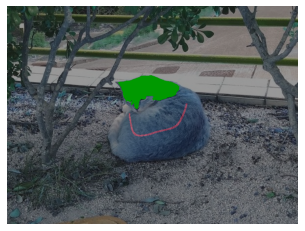

In [56]:
import matplotlib.pyplot as plt
mask = np.ones(image.shape)
for i in range(indx.shape[0]):
    mask[indx[i][0], indx[i][1]] = [0, 1, 0]
scribble = cv2.imread("s1.png", cv2.IMREAD_GRAYSCALE)

dim = np.zeros(scribble.shape)
R = np.stack((scribble, dim, dim), axis=2)
plt.figure()
plt.imshow(image)
plt.imshow(mask, alpha=0.1)
plt.imshow(R, alpha=0.4)
plt.axis('off')
plt.show()

In [68]:
import torch


/home/rana/anaconda3/envs/mask2former/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [80]:
a = torch.zeros((20,20))
b = torch.ones((20,20))

In [81]:
c = torch.stack([a,b],0)
c.shape

torch.Size([2, 20, 20])

In [75]:
a = a.unsqueeze(0).unsqueeze(0)
b = b.unsqueeze(0).unsqueeze(0)

In [77]:
t = torch.cat([a,b], 1)
t.shape

torch.Size([1, 2, 20, 20])

In [78]:
from util.tensor_util import pad_divide_by
t, _ = pad_divide_by(t, 16)

In [79]:
t.shape

torch.Size([1, 2, 32, 32])